## Install and load libraries

In [ ]:
# need for technical feature creation
!pip install ta
!pip install hurst

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=742847b51a6e5fce3f87a3e40de944f3682214f458fce10a3599b912fc2aa3b0
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# pip install bayes_opt
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
from pandas.tseries.offsets import BDay
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import norm, t
import statsmodels.api as sm
import networkx as nx
from statsmodels.tsa.stattools import grangercausalitytests
import ta
from ta import add_all_ta_features
from hurst import compute_Hc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from time import time
import joblib
# !pip install causalnex
# from causalnex.structure import Dynotears
# from causalnex.plots import plot_structure
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from time import time

import joblib

# display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


# from bayes_opt import BayesianOptimization

# Libraries for Deep Learning Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression

# needed for `HistGradientBoostingClassifier`
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# from `keras.optimizers` import SGD

## Classes
-  TickerData - mainly for data import from YF and storing in git repo
-  Exploratory - For exploring interesting patterns and characteristics about data
-  Strategy - For strategy and feature creation

In [ ]:
class TickerData:
    def __init__(self):
        # URL of the Yahoo Finance commodities page
        tickers = []
        descriptions = []
        for cat in ['commodities','currencies']:
            url = f'https://finance.yahoo.com/markets/{cat}/'
        # url = 'https://finance.yahoo.com/markets/commodities/'
        # https://finance.yahoo.com/markets/currencies/

            # Request the page content
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')

            yf_attribute_dict = {'ticker':'symbol yf-ravs5v',
                                'description':'yf-ravs5v longName'}
            for key,value in yf_attribute_dict.items():
                long_text = soup.find_all('span', attrs={'class':value})
                for val in long_text:
                    if key =='ticker':
                        tickers.append(str(val)[str(val).find(value)+len(value)+2:str(val).find("</span>")])
                    elif key =='description':
                        descriptions.append(str(val)[str(val).find(value)+len(value)+9:str(val).find('">')].replace("amp;", ""))
                        # print(str(val)[str(val).find(value)+len(value)+9:str(val).find('">')].replace("amp;", ""))

        # print(descriptions)
        config_df = pd.DataFrame({'Ticker':tickers,'Description':descriptions})
        config_df.loc[config_df.Ticker.str.contains('=F'),'Category'] = 'Futures'
        config_df.loc[config_df.Ticker.str.contains('=X'),'Category'] = 'Forward'
        config_df.loc[config_df.Category=='Futures','Sub_category'] = 'Commodity'
        config_df.iloc[:4,3] = 'Equity'
        config_df.iloc[4:8,3] = 'Bond'
        config_df.loc[config_df.Category=='Forward','Sub_category'] = 'Currency'
        self.config = config_df
        self.tickers = tickers
        self.data = {}

    def get_tickers(self,category=None,sub_category=None):
        config = self.config
        if (category == None)&(sub_category==None):
            return self.tickers
        elif (category == None)&(sub_category!=None):
            return config.loc[config.Sub_category==sub_category,'Ticker'].tolist()
        elif (category != None)&(sub_category==None):
            return config.loc[config.Category==category,'Ticker'].tolist()
        else:
            return config.loc[(config.Category==category) & (config.Sub_category==sub_category),'Ticker'].tolist()

    def get_config(self):
        return self.config

    def store_git(self,file_name):
        !git config --global user.email "ditesh.verma@gmail.com"
        !git config --global user.name "laughingbud"
        # !got config --global user.password "wrongpassword"
        token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
        username = 'laughingbud'
        repo = 'conquer'
        !git clone https://{token}@github.com/{username}/{repo}

        all_data.to_csv(f'conquer/all_ticker_intraday_data_{all_data.index.get_level_values(1).unique()[0].strftime("%Y-%m-%d")}.csv')
        !git status
        !git add --all
        !git commit -a -m "adding intraday data"
        !git status
        !git remote -v
        !git commit -a -m "adding intraday data"
        !git push origin main

        # self.config.to_csv(file_name)
        return None

    def download_data(self, tickers, start_date, interval='1h',
                      default_max_period=False):
        if interval=='1h':
            # Maximum of last 730 calendar days can be queried for YF
            max_start_date = (today-timedelta(730)+ BDay(1)).strftime("%Y-%m-%d")

            date1_obj = datetime.strptime(start_date.strftime("%Y-%m-%d"),
                                                  '%Y-%m-%d')
            date2_obj = datetime.strptime(max_start_date, '%Y-%m-%d')
            if date1_obj < date2_obj:
                print("Given date is earlier than allowed by YF.")
            else:
                print("Given date is within the max period allowed by YF.")

            if default_max_period == True:
                adj_start_date = max_start_date
                print("Defaulting to Max allowed start date.")
            else:
                adj_start_date = start_date
                print("Defaulting to user defined start date.")

        ticker_data = pd.DataFrame()
        for ticker in tickers:
            ticker_obj = yf.Ticker(ticker)
            if interval=='1h':
                ticker_data = ticker_obj.history(
                    start=adj_start_date,interval=interval)
            else:
                ticker_data = ticker_obj.history(start=start_date.strftime("%Y-%m-%d"),
                                                 interval=interval)
            if ticker_data.empty:
                print(f"No data found for {ticker}")
                continue
            else:
                # ticker_data['rets'] = ticker_data['Close'].pct_change()
                ticker_data['rets'] = np.log(
                    ticker_data['Close'] / ticker_data['Close'].shift(1))
                # ticker_data['rets'] = (ticker_data['Close'] - ticker_data['Open'])/ticker_data['Open']

                if interval.find('h')==1:
                    ticker_data['hour'] = ticker_data.index.hour
                #     ticker_data['range'] = ticker_data['High'] - ticker_data['Low']
                #     ticker_data['std'] = ticker_data['rets'].rolling(
                #         window=24).std()*np.sqrt(24)
                # del ticker_data['Volume']
                del ticker_data['Dividends']
                del ticker_data['Stock Splits']
                ticker_data = ticker_data.dropna()
                self.data[ticker] = ticker_data


In [ ]:
class Exploratory():
    def __init__(self):
        pass

    def plot_histograms(self,df,label='returns'):

        rows = 1
        cols = df.shape[1]
        fig,ax = plt.subplots(rows,cols,figsize=(18,3))

        for n in range(cols):
            mean = np.mean(df[df.columns[n]])
            stdev = np.std(df[df.columns[n]])
            skewness = skew(df[df.columns[n]])
            kurt = kurtosis(df[df.columns[n]])
            nu, mu, sigma = t.fit(df[df.columns[n]])

            x=np.linspace(mean-4*stdev, mean + 4*stdev, 100)
            ax[n].plot(x,norm.pdf(x, mean, stdev), "r", label="normal")
            ax[n].plot(x,t.pdf(x, nu,mu, sigma), "g", label="t-dist")
            # df[df.columns[n]].plot(kind='hist', bins=50,
            #                                   title=df.columns[n],ax=ax[n])
            ax[n].legend(loc="upper right")
            ax[n].set_title(df.columns[n])
            df[df.columns[n]].hist(bins=50,density=True,histtype='stepfilled',
                                   alpha=0.5,ax=ax[n])
            ax[n].set_xlabel(label)
            ax[n].set_ylabel('frequency')
            ax[n].text(0.02, 0.9, f'Mean: {mean:.3f}', fontsize=9,transform=ax[n].transAxes)
            ax[n].text(0.02, 0.8, f'Std dev: {stdev:.2f}', fontsize=9,transform=ax[n].transAxes)
            ax[n].text(0.02, 0.7, f'Skewness: {skewness:.1f}', fontsize=9,transform=ax[n].transAxes)
            ax[n].text(0.02, 0.6, f'Kurtosis: {kurt:.1f}', fontsize=9,transform=ax[n].transAxes)

        plt.tight_layout()

    def plot_autocorrelations(self,df):
        fig,ax = plt.subplots(2,df.shape[1],figsize=(18,5))
        for n in range(df.shape[1]):
            # model = self.best_arima(df.iloc[:,n])
            sm.graphics.tsa.plot_acf(df.iloc[:,n], lags=range(1,25), ax=ax[0,n])
            ax[0,n].set_title(f'ACF: {df.columns[n]} returns')
            ax[0,n].set_ylim([-0.4, 0.4])
            sm.graphics.tsa.plot_pacf(df.iloc[:,n], lags=range(1,25), ax=ax[1,n])
            ax[1,n].set_title(f'PACF: {df.columns[n]} returns')
            ax[1,n].set_ylim([-0.4, 0.4])
        plt.tight_layout()

    def correlation_network(self,corr_matrix,threshold=0.15):
        # corr_matrix = correlation_matrix.copy()
        # Create the correlation network
        G = nx.Graph()

        # Add edges based on correlation threshold
        threshold = threshold  # Adjust this threshold as needed
        for i in corr_matrix.columns:
            for j in corr_matrix.columns:
                if i != j and abs(corr_matrix.loc[i, j]) > threshold:
                    G.add_edge(i, j, weight=corr_matrix.loc[i, j])

        # Draw the network
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=10)
        plt.title(f'Correlation Network (threshold={threshold})')
        plt.show()

    def causal_network(self,df,maxlag=1):
        G = nx.Graph()
        maxlag = maxlag
        # Example: Test causality between all pairs
        for i in df.columns:
            for j in df.columns:
                if i != j:
                    result = grangercausalitytests(df[[i, j]], maxlag=maxlag, verbose=False)
                    p_values = [round(result[lag][0]['ssr_ftest'][1], 4) for lag in range(1, maxlag+1)]
                    if min(p_values) < 0.05:
                        G.add_edge(i, j, weight=min(p_values))  # Directed edge if i Granger-causes j

        # Draw the causal network
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray',
                node_size=1500, font_size=10, arrows=True)
        plt.title(f'Causal Network (maxlag={maxlag})')
        plt.show()

    def granger_causality(self,df,maxlag=1):
        maxlag = maxlag  # Set the maximum lag to consider
        test_results = {}

        # Perform Granger causality tests for each pair of hourly returns
        for hr1 in df.columns:
          for hr2 in df.columns:
            if hr1 != hr2:
              # Test if hr1 causes hr2
              result = grangercausalitytests(df[[hr2, hr1]], maxlag=maxlag,
                                            verbose=False)
              p_values = [round(result[i+1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
              test_results[(hr1, hr2)] = p_values

        # Print the results
        print("Granger Causality Test Results:")
        for (hr1, hr2), p_values in test_results.items():
          # if showcausal & (p_value < 0.05):
          print(f"Does {hr1} cause {hr2}?")
          for i, p_value in enumerate(p_values):
            print(f"Lag {i+1}: p-value = {p_value}")
            if p_value < 0.05:
              print(f"  => Significant evidence of causality at lag {i+1}")
          print("----")

    def causal_matrix(self, df, maxlag=1):
        """
        Creates a matrix highlighting causal relationships based on Granger causality tests.

        Args:
            df (pd.DataFrame): DataFrame containing time series data.
            maxlag (int): Maximum lag to consider for Granger causality tests.

        Returns:
            pd.DataFrame: A DataFrame representing the causal matrix, where 1 indicates causality
                          and 0 indicates no causality.
        """

        causal_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=int)
        causal_matrix[:] = 0  # Initialize with no causality

        for hr1 in df.columns:
            for hr2 in df.columns:
                if hr1 != hr2:
                    result = grangercausalitytests(df[[hr2, hr1]], maxlag=maxlag, verbose=False)
                    p_values = [round(result[i + 1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
                    if min(p_values) < 0.05:
                        causal_matrix.loc[hr1, hr2] = 1  # Mark causality if p-value < 0.05

        return causal_matrix


    def causal_strength_matrix(self, df, maxlag=1):
        """
        Creates a matrix capturing the strength of causal relationships
        based on Granger causality tests.

        Args:
            df (pd.DataFrame): DataFrame containing time series data.
            maxlag (int): Maximum lag to consider for Granger causality tests.

        Returns:
            pd.DataFrame: A DataFrame representing the causal strength matrix,
                          where values indicate the minimum p-value found for
                          significant causal relationships. Non-significant
                          relationships are represented as NaN.
        """

        causal_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
        causal_matrix[:] = np.nan  # Initialize with NaN for non-significant relationships

        for hr1 in df.columns:
            for hr2 in df.columns:
                if hr1 != hr2:
                    result = grangercausalitytests(df[[hr2, hr1]], maxlag=maxlag, verbose=False)
                    p_values = [round(result[i + 1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
                    min_p_value = min(p_values)
                    if min_p_value < 0.05:
                        causal_matrix.loc[hr1, hr2] = min_p_value  # Store the minimum p-value

        # Visualize the causal strength matrix as a heatmap (showing only causal relationships)
        plt.figure(figsize=(10, 8))
        sns.heatmap(causal_matrix.round(2), annot=True, cmap="YlGnBu", cbar=True, mask=causal_matrix.isnull())
        plt.title("Causal Strength Matrix Heatmap")
        plt.xlabel("Effect (Caused)")
        plt.ylabel("Cause (Causing)")
        plt.show()

        return causal_matrix

exp = Exploratory()

In [88]:
class Strategy:
    def __init__(self):
        pass

    def split_data(self,data,features,test_size=0.2,position_type='long_only',bid_ask=0,
                   h_period=1):

        bid_ask = 0.03125 if bid_ask == None else bid_ask
        X = data[features].dropna()

        if position_type == 'short_only':
            y = np.where(data['Close'].shift(-h_period) - data['Close'] < bid_ask, 1, 0)  # Binary target
        else:
            if position_type=='long_only':
                y = np.where(data['Close'].shift(-h_period) - data['Close'] > bid_ask, 1, 0)  # Binary target
            elif (position_type=='long_short'):
                y = np.where(data['Close'].shift(-h_period) - data['Close'] < bid_ask,
                                2, 0)  # Trinary target
                y = np.where(data['Close'].shift(-h_period) - data['Close'] > bid_ask,
                                1, y)  # Trinary target
            else:
                print('Invalid position type')
                return None

        # y = np.where(data['Close'].shift(-h_period) - data['Close'] > bid_ask, 1, 0)  # Binary target
        # if (position_type=='long_short'):
        #     y = np.where(data['Close'].shift(-h_period) - data['Close'] < bid_ask,
        #                  bid_ask, y)  # Binary target
        y = y[-X.shape[0]:]
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=test_size,
                                                            shuffle=False)
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)

        scaler = StandardScaler().fit(X_test)
        X_test = scaler.transform(X_test)

        print(f'X_train size: {X_train.shape}')
        print(f'X_test size: {X_test.shape}')
        print(f'y_train size: {y_train.shape}')
        print(f'y_test size: {y_test.shape}')
        return X_train, X_test, y_train, y_test

    def create_mean_reversion_features(self, data, window=20):
        features = pd.DataFrame(index=data.index)

        # 1. Close Price
        features['Close'] = data['Close']

        # 2. Moving Average of Close
        features['SMA_Close'] = data['Close'].rolling(window=window).mean()

        # 3. Exponential Moving Average of Close
        features['EMA_Close'] = data['Close'].ewm(span=window, adjust=False).mean()

        # 4. Z-Score of Close
        features['Z-Score_Close'] = (data['Close'] - features['SMA_Close']) / data['Close'].rolling(window=window).std()

        # 5. Relative Strength Index (RSI)
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        features['RSI'] = 100 - (100 / (1 + rs))

        # 6. Bollinger Bands
        features['Upper_Band'] = features['SMA_Close'] + 2 * data['Close'].rolling(window=window).std()
        features['Lower_Band'] = features['SMA_Close'] - 2 * data['Close'].rolling(window=window).std()

        # 7. Mean Reversion Indicator
        features['Mean_Reversion_Indicator'] = data['Close'] - features['SMA_Close']

        # 8. Price Rate of Change (ROC)
        features['ROC_Close'] = data['Close'].pct_change(periods=window)

        # 9. Average True Range (ATR)
        high_low = data['High'] - data['Low']
        high_close = np.abs(data['High'] - data['Close'].shift(1))
        low_close = np.abs(data['Low'] - data['Close'].shift(1))
        tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
        features['ATR'] = tr.rolling(window=window).mean()

        # 10. Standard Deviation of Returns
        features['Std_Dev_Returns'] = data['Close'].pct_change().rolling(window=window).std()

        # 11. Lagged Returns
        features['Lagged_Returns'] = data['Close'].pct_change().shift(1)

        # 12. Volume Moving Average
        features['Volume_MA'] = data['Volume'].rolling(window=window).mean()

        # 13. Volume Rate of Change
        features['Volume_ROC'] = data['Volume'].pct_change(periods=window)

        # 14. High-Low Spread
        features['High_Low_Spread'] = data['High'] - data['Low']

        # 15. Close-Open Spread
        features['Close_Open_Spread'] = data['Close'] - data['Open']

        # 16. Close-Previous Close Spread
        features['Close_Previous_Close_Spread'] = data['Close'] - data['Close'].shift(1)

        # 17. Cumulative Volume
        features['Cumulative_Volume'] = data['Volume'].cumsum()

        # 18. Volume Weighted Average Price (VWAP)
        features['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

        return features

    def create_trend_features(self, data, window=20):
        features = pd.DataFrame(index=data.index)

        # 1. Close Price
        features['Close'] = data['Close']

        # 2. Moving Average Convergence Divergence (MACD)
        features['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
        features['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
        features['MACD'] = features['EMA_12'] - features['EMA_26']
        features['MACD_Signal'] = features['MACD'].ewm(span=9, adjust=False).mean()

        # 3. Relative Strength Index (RSI)
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        features['RSI'] = 100 - (100 / (1 + rs))

        # 4. Stochastic Oscillator
        features['Stoch_K'] = ((data['Close'] - data['Low'].rolling(window=window).min()) /
                                (data['High'].rolling(window=window).max() - data['Low'].rolling(window=window).min())) * 100
        features['Stoch_D'] = features['Stoch_K'].rolling(window=3).mean()  # 3-period smoothing

        # 5. Average True Range (ATR)
        high_low = data['High'] - data['Low']
        high_close = np.abs(data['High'] - data['Close'].shift(1))
        low_close = np.abs(data['Low'] - data['Close'].shift(1))
        tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
        features['ATR'] = tr.rolling(window=window).mean()

        # 6. Rate of Change (ROC)
        features['ROC'] = data['Close'].pct_change(periods=window)

        # 7. Momentum
        features['Momentum'] = data['Close'] - data['Close'].shift(window)

        # 8. Cumulative Returns
        features['Cumulative_Returns'] = (1 + data['Close'].pct_change()).cumprod() - 1

        # 9. Volatility
        features['Volatility'] = data['Close'].pct_change().rolling(window=window).std()

        # 10. Bollinger Bands
        features['SMA_Close'] = data['Close'].rolling(window=window).mean()
        features['Upper_Band'] = features['SMA_Close'] + 2 * data['Close'].rolling(window=window).std()
        features['Lower_Band'] = features['SMA_Close'] - 2 * data['Close'].rolling(window=window).std()

        # 11. Volume Weighted Average Price (VWAP)
        features['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

        # 12. On-Balance Volume (OBV)
        features['OBV'] = (data['Volume'] * np.sign(data['Close'].diff())).cumsum()

        # 13. Accumulation/Distribution Line
        features['AD'] = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low']) * data['Volume']
        features['AD_Line'] = features['AD'].cumsum()

        # 14. Price Action
        features['Price_Action'] = data['Close'].diff()

        # 15. Lagged Price
        features['Lagged_Price'] = data['Close'].shift(1)

        # 16. Exponential Moving Average (EMA)
        features['EMA'] = data['Close'].ewm(span=window, adjust=False).mean()

        # 17. Trend Strength Indicator (Custom)
        features['Trend_Strength'] = features['Close'].diff(window).rolling(window=window).mean()

        return features


    def mean_reversion(self,data,lookback,band_tol):
        if lookback is None:
            # Handle the case where lookback is not provided
            lookback = 4 # Or any other suitable default value
        if band_tol is None:
            band_tol = 2 # Or any other suitable default value
        # Calculate Bollinger Bands
        data['MA20'] = data['Close'].rolling(window=lookback).mean()
        data['STD20'] = data['Close'].rolling(window=lookback).std()
        data['Upper'] = data['MA20'] + (data['STD20'] * band_tol)
        data['Lower'] = data['MA20'] - (data['STD20'] * band_tol)
        data['Buy'] = np.where(data['Close'] < data['Lower'], 1, 0)
        data['Sell'] = np.where(data['Close'] > data['Upper'], -1, 0)
        data['Position'] = data['Buy'] + data['Sell']

        # Shift position to reflect trades
        data['Position'] = data['Position'].shift(1)

        # Calculate returns
        data['Returns'] = data['Close'].pct_change() * data['Position']
        data['Cumulative'] = (1 + data['Returns']).cumprod()
        # display(data)
        # Plot the cumulative returns
        plt.figure(figsize=(12, 6))
        data['Cumulative'].plot()
        plt.title('Strategy Cumulative Returns')
        plt.show()

        initial_capital = 100000
        data['Strategy Value'] = initial_capital * data['Cumulative']

        # Show the final strategy value
        print(f"Final Portfolio Value: {data['Strategy Value'].iloc[-1]:.2f}")
        return None

    def compute_rsi(self, data, window):
        """
        Computes the Relative Strength Index (RSI) for a given dataset.

        :param data: A Pandas Series of prices (usually 'Close' prices).
        :param window: The number of periods to use for RSI calculation (typically 14).
        :return: A Pandas Series representing the RSI.
        """
        delta = data.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        return rsi


    def momentum(self,data,st_lb,lt_lb,rsi_lb,rsi_ut,rsi_lt):
        if rsi_lb is None:
            # Handle the case where lookback is not provided
            rsi_lb = 14 # Or any other suitable default value
        if st_lb is None:
            # Handle the case where lookback is not provided
            st_lb = 20 # Or any other suitable default value
        if lt_lb is None:
            # Handle the case where lookback is not provided
            lt_lb = 50 # Or any other suitable default value
        if rsi_ut is None:
            rsi_ut = 70 # Or any other suitable default value
        if rsi_lt is None:
            rsi_lt = 30 # Or any other suitable default value

        # Calculate SMA and RSI
        data['SMA20'] = data['Close'].rolling(window=st_lb).mean()
        data['SMA50'] = data['Close'].rolling(window=lt_lb).mean()
        data['RSI'] = self.compute_rsi(data['Close'], rsi_lb)

        # Define buy/sell signals based on SMA crossover and RSI
        data['Buy'] = np.where((data['SMA20'] > data['SMA50']) & (data['RSI'] < rsi_ut), 1, 0)
        data['Sell'] = np.where((data['SMA20'] < data['SMA50']) & (data['RSI'] > rsi_lt), -1, 0)
        data['Position'] = data['Buy'] + data['Sell']

        # Shift position to reflect trades
        data['Position'] = data['Position'].shift(1)

        # Calculate returns
        data['Returns'] = data['Close'].pct_change() * data['Position']
        data['Cumulative'] = (1 + data['Returns']).cumprod()

        # Plot the cumulative returns
        plt.figure(figsize=(12, 6))
        data['Cumulative'].plot()
        plt.title('Momentum Strategy Cumulative Returns')
        plt.show()

        initial_capital = 100000
        data['Strategy Value'] = initial_capital * data['Cumulative']

        # Show the final strategy value
        print(f"Final Portfolio Value: {data['Strategy Value'].iloc[-1]:.2f}")



In [ ]:
today = datetime.today()
last_bday = (today - BDay(1)).strftime("%Y-%m-%d")

### Import data

In [ ]:
td = TickerData()
# tickers = td.get_tickers() #This will import all tickers from YF including futures and forwards
# print(tickers)
tickers = ['ZB=F']
td.download_data(tickers=tickers,start_date=(today - BDay(10330)),
                 interval='1h',default_max_period=True)#,interval='1D' # Add a check on what data we have already and adjust accordingly

Given date is earlier than allowed by YF.
Defaulting to Max allowed start date.


In [ ]:
td.data['ZB=F']

Open        High         Low       Close  \
Datetime                                                                    
2022-09-19 01:00:00-04:00  131.000000  131.000000  130.906250  130.937500   
2022-09-19 02:00:00-04:00  130.937500  131.000000  130.812500  131.000000   
2022-09-19 03:00:00-04:00  131.000000  131.031250  130.687500  130.718750   
2022-09-19 04:00:00-04:00  130.718750  130.750000  130.562500  130.562500   
2022-09-19 05:00:00-04:00  130.593750  130.625000  130.562500  130.625000   
2022-09-19 06:00:00-04:00  130.593750  130.687500  130.531250  130.593750   
2022-09-19 07:00:00-04:00  130.562500  130.593750  130.156250  130.375000   
2022-09-19 08:00:00-04:00  130.343750  131.031250  130.156250  130.937500   
2022-09-19 09:00:00-04:00  130.937500  131.218750  130.531250  130.718750   
2022-09-19 10:00:00-04:00  130.687500  131.406250  130.656250  130.937500   
2022-09-19 11:00:00-04:00  130.937500  131.218750  130.875000  130.968750   
2022-09-19 12:00:00-04:00  130.968750  131.281250  130.937500  131.187500   
2022-09-19 13:00:00-04:00  131.187500  131.312500  131.062500  131.093750   
2022-09-19 14:00:00-04:00  131.062500  131.125000  130.937500  131.000000   
2022-09-19 15:00:00-04:00  131.000000  131.062500  130.906250  130.968750   
2022-09-19 16:00:00-04:00  130.968750  131.000000  130.812500  130.875000   
2022-09-19 18:00:00-04:00  130.875000  130.968750  130.875000  130.906250   
2022-09-19 19:00:00-04:00  130.875000  130.968750  130.812500  130.875000   
2022-09-19 20:00:00-04:00  130.906250  131.031250  130.906250  130.968750   
2022-09-19 21:00:00-04:00  130.968750  131.093750  130.937500  130.968750   
2022-09-19 22:00:00-04:00  130.968750  131.062500  130.937500  131.062500   
2022-09-19 23:00:00-04:00  131.031250  131.125000  131.031250  131.093750   
2022-09-20 00:00:00-04:00  131.093750  131.093750  130.937500  130.937500   
2022-09-20 01:00:00-04:00  130.937500  131.031250  130.906250  130.968750   
2022-09-20 02:00:00-04:00  130.968750  131.000000  130.781250  130.875000   
2022-09-20 03:00:00-04:00  130.875000  130.906250  130.500000  130.500000   
2022-09-20 04:00:00-04:00  130.500000  130.968750  130.375000  130.437500   
2022-09-20 05:00:00-04:00  130.437500  130.437500  130.156250  130.281250   
2022-09-20 06:00:00-04:00  130.281250  130.718750  130.156250  130.250000   
2022-09-20 07:00:00-04:00  130.218750  130.250000  129.875000  130.000000   
2022-09-20 08:00:00-04:00  130.000000  130.062500  129.500000  129.781250   
2022-09-20 09:00:00-04:00  129.781250  129.906250  129.312500  129.593750   
2022-09-20 10:00:00-04:00  129.562500  130.031250  129.187500  129.343750   
2022-09-20 11:00:00-04:00  129.343750  129.750000  129.218750  129.718750   
2022-09-20 12:00:00-04:00  129.718750  130.062500  129.687500  130.031250   
2022-09-20 13:00:00-04:00  130.031250  130.750000  130.031250  130.312500   
2022-09-20 14:00:00-04:00  130.312500  130.343750  129.812500  129.843750   
2022-09-20 15:00:00-04:00  129.812500  130.406250  129.750000  129.937500   
2022-09-20 16:00:00-04:00  129.937500  130.343750  129.843750  129.968750   
2022-09-20 18:00:00-04:00  129.906250  130.312500  129.875000  129.906250   
2022-09-20 19:00:00-04:00  129.875000  129.968750  129.843750  129.937500   
2022-09-20 20:00:00-04:00  129.937500  130.343750  129.906250  130.000000   
2022-09-20 21:00:00-04:00  130.000000  130.156250  130.000000  130.156250   
2022-09-20 22:00:00-04:00  130.125000  130.156250  130.031250  130.031250   
2022-09-20 23:00:00-04:00  130.062500  130.062500  129.937500  130.000000   
2022-09-21 00:00:00-04:00  130.000000  130.093750  129.937500  130.093750   
2022-09-21 01:00:00-04:00  130.093750  130.343750  130.093750  130.312500   
2022-09-21 02:00:00-04:00  130.312500  130.562500  130.187500  130.281250   
2022-09-21 03:00:00-04:00  130.281250  130.593750  130.218750  130.437500   
2022-09-21 04:00:00-04:00  130.406250  130.593750  130.406250  130.468750   
2022-09-21 05:00:00-04:00  13

In [ ]:
# Combine all dataframes into a single dataframe
all_data = pd.concat(td.data.values(), keys=td.data.keys())
# all_data
# Export to a single file (e.g., CSV)
# all_data.to_csv(f'all_ticker_intraday_data_{all_data.index.get_level_values(1).unique()[0].strftime("%Y-%m-%d")}.csv')


<Axes: title={'center': 'Futures returns'}, xlabel='Datetime'>

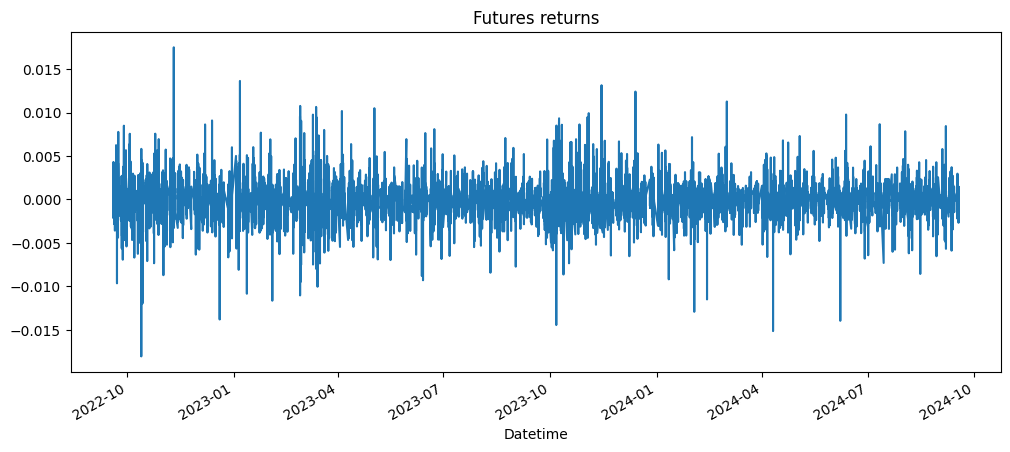

In [ ]:
all_data.loc['ZB=F']['rets'].plot(figsize=(12,5),title='Futures returns')

## Exploratory research

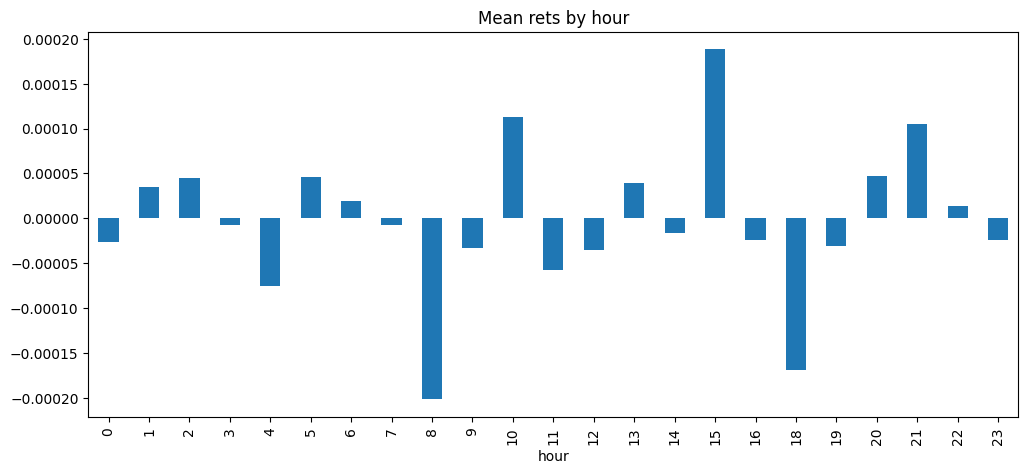

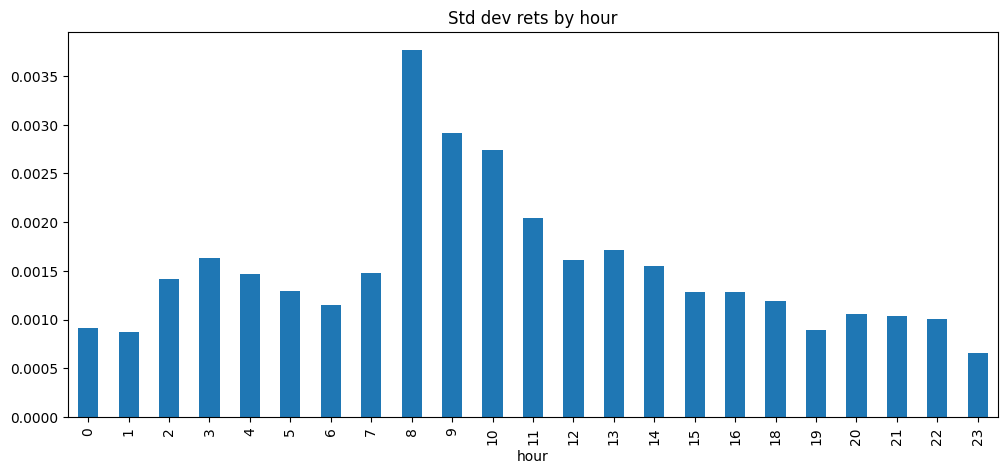

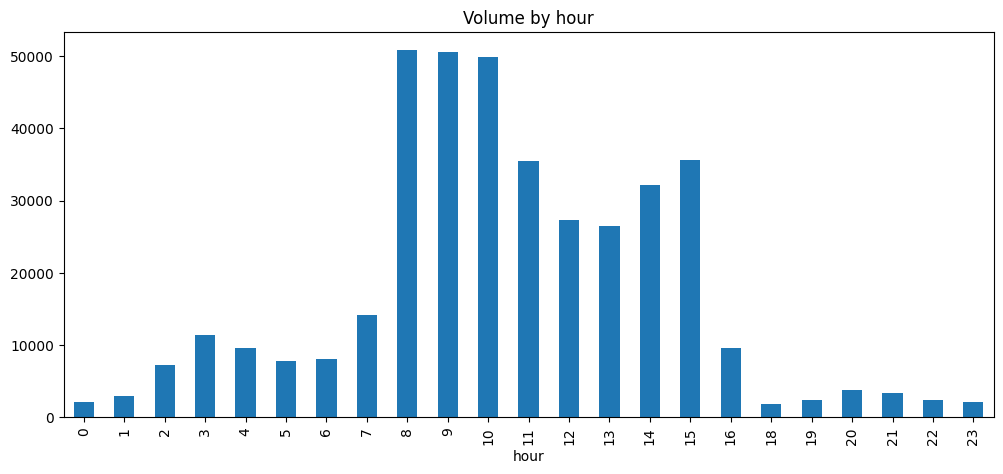

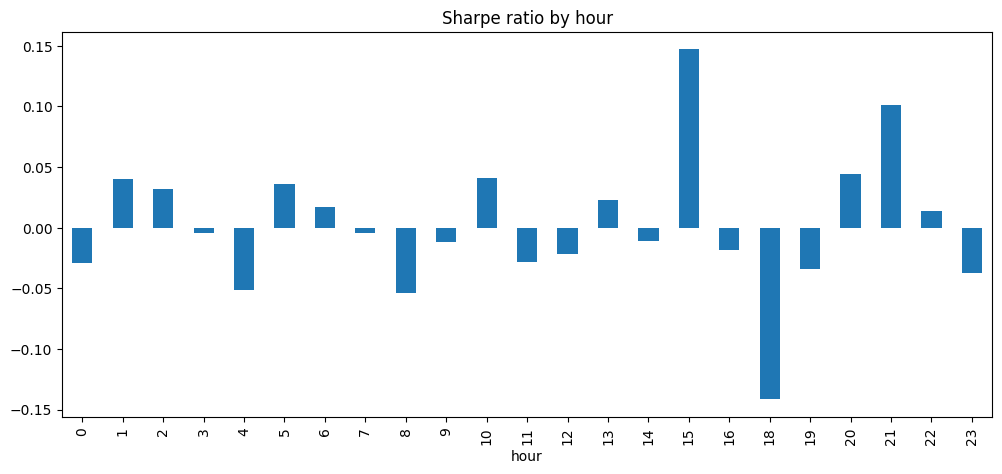

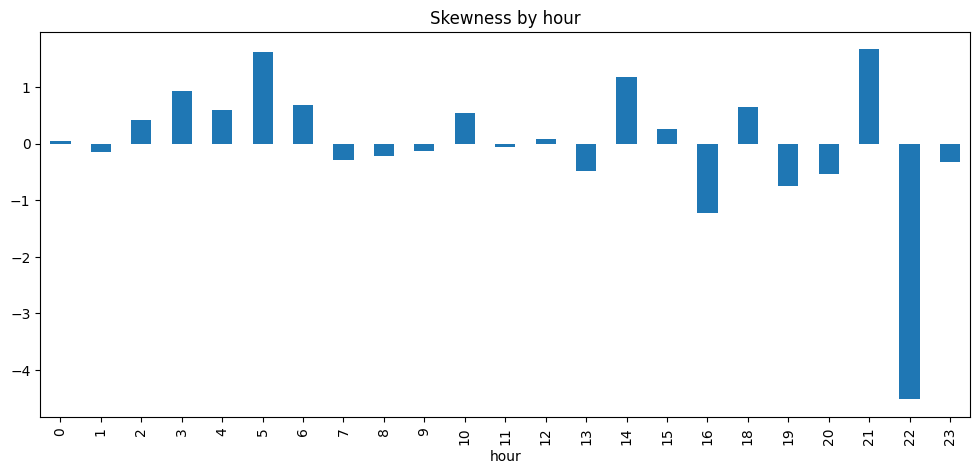

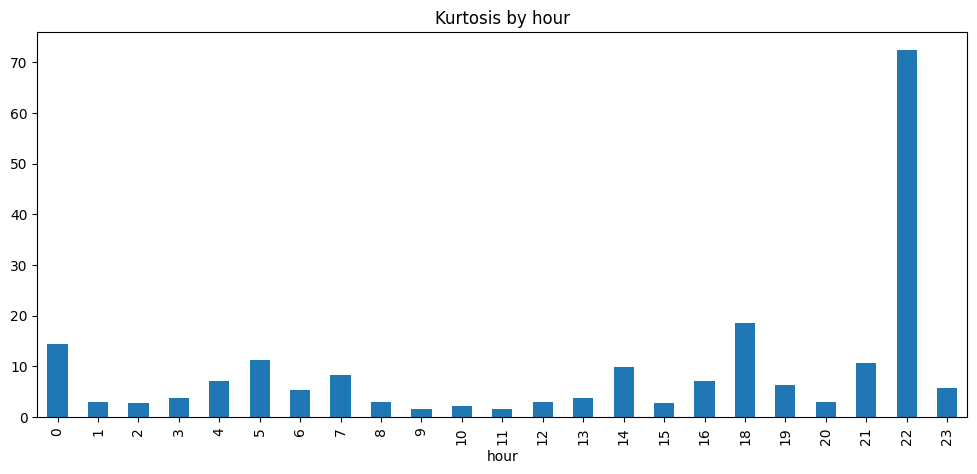

In [ ]:
# all_data.loc['ZB=F']['hour']
# lb = 1080
lb = all_data.loc['ZB=F'].shape[0]
mean_rets_hour = all_data.loc['ZB=F'].iloc[-lb:,:].groupby('hour')['rets'].mean()
std_rets_hour = all_data.loc['ZB=F'].iloc[-lb:,:].groupby('hour')['rets'].std()
sharpe_hour = mean_rets_hour/std_rets_hour
volumes_hour = all_data.loc['ZB=F'].iloc[-lb:,:].groupby('hour')['Volume'].mean()
skewness_hour = all_data.loc['ZB=F'].iloc[-lb:,:].groupby('hour')['rets'].apply(lambda x: skew(x))
kurtosis_hour = all_data.loc['ZB=F'].iloc[-lb:,:].groupby('hour')['rets'].apply(lambda x: kurtosis(x))

mean_rets_hour.plot.bar(figsize=(12,5),title='Mean rets by hour')
plt.show()
std_rets_hour.plot.bar(figsize=(12,5),title='Std dev rets by hour')
plt.show()
volumes_hour.plot.bar(figsize=(12,5),title='Volume by hour')
plt.show()
sharpe_hour.plot.bar(figsize=(12,5),title='Sharpe ratio by hour')
plt.show()
skewness_hour.plot.bar(figsize=(12,5),title='Skewness by hour')
plt.show()
kurtosis_hour.plot.bar(figsize=(12,5),title='Kurtosis by hour')
plt.show()

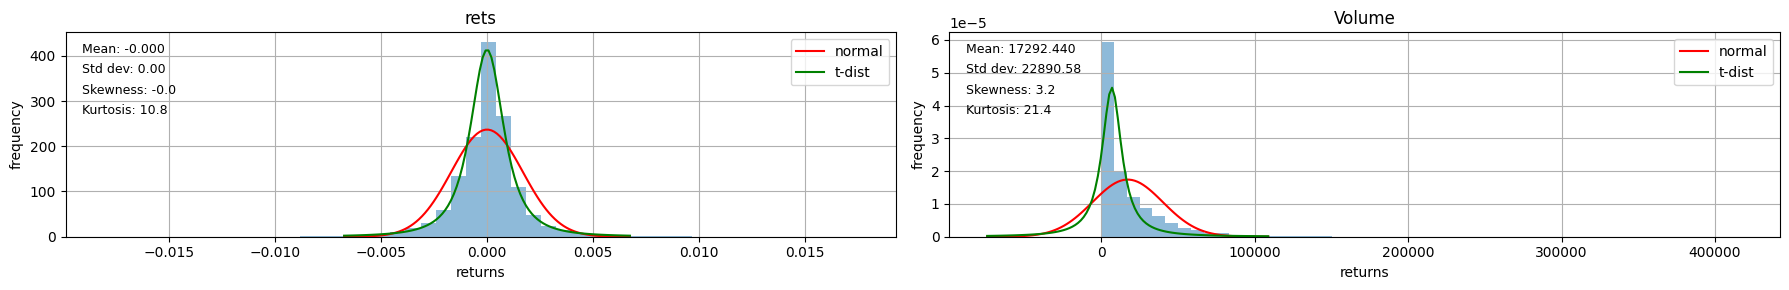

In [ ]:

exp.plot_histograms(all_data.loc['ZB=F'][['rets','Volume']])

Text(0.5, 1.0, 'Hourly returns')

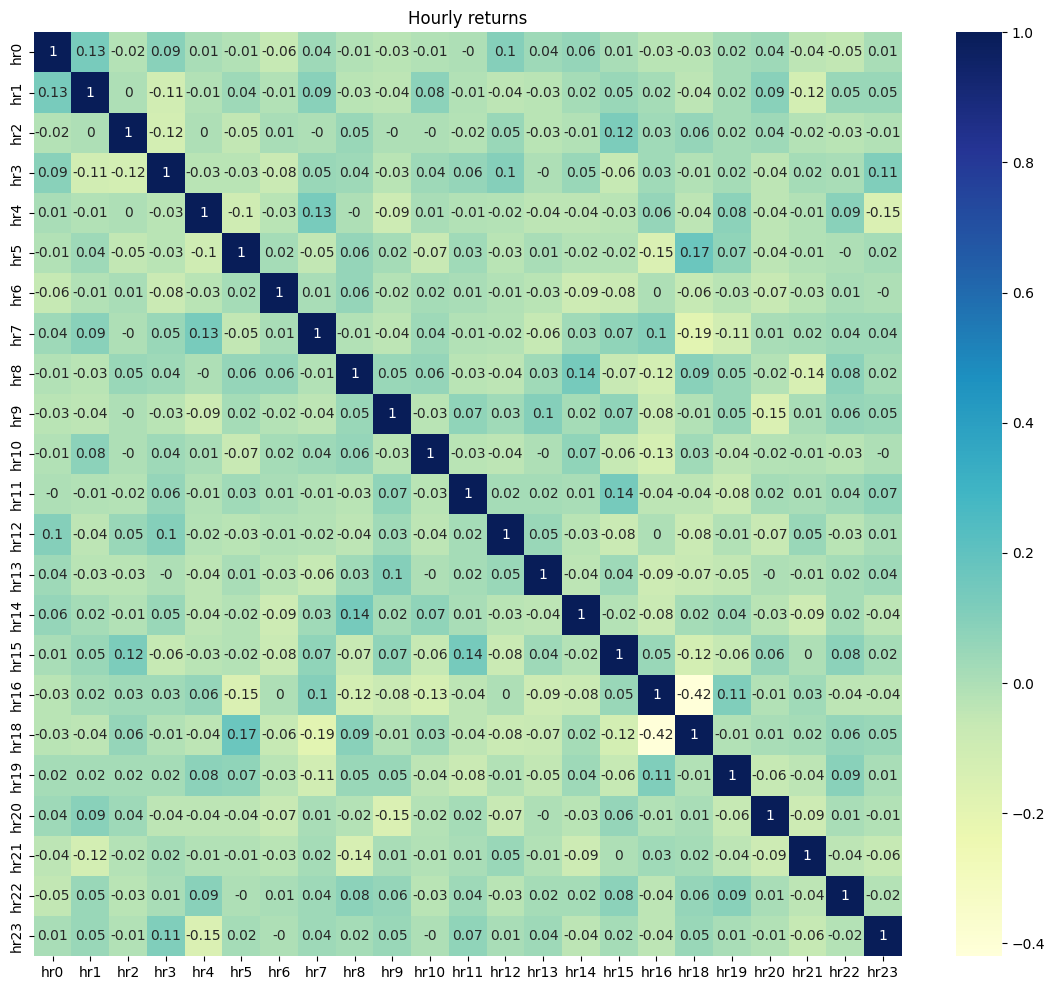

In [ ]:
plt.figure(figsize=(14, 12))
hourly_returns = pd.DataFrame()
# Calculate hourly returns
for hr in all_data.loc['ZB=F']['hour'].unique():
    # print(hr)
    hour_ret = all_data.loc['ZB=F'].loc[all_data.loc['ZB=F']['hour']==hr, 'rets'].to_frame(f'hr{hr}')
    hour_ret.index = all_data.loc['ZB=F'].loc[all_data.loc['ZB=F']['hour']==hr, 'rets'].index.date
    hourly_returns = pd.concat([hourly_returns,hour_ret],axis=1)
# hourly_returns
# Calculate correlation matrix
# Reorder columns to start with 'hr0'
cols = hourly_returns.columns.tolist()
cols = cols[-1:] + cols[:-1]  # Move the last column ('hr0') to the front
hourly_returns = hourly_returns[cols].dropna()

# Calculate correlation matrix
correlation_matrix = hourly_returns.corr()

sns.heatmap(correlation_matrix.round(2), cmap="YlGnBu",annot=True)
plt.title('Hourly returns')


In [ ]:
# all_data.loc['ZB=F']['hour'].unique()

In [ ]:
# range(1,int((hourly_returns.shape[1]+1)/ncols))

1


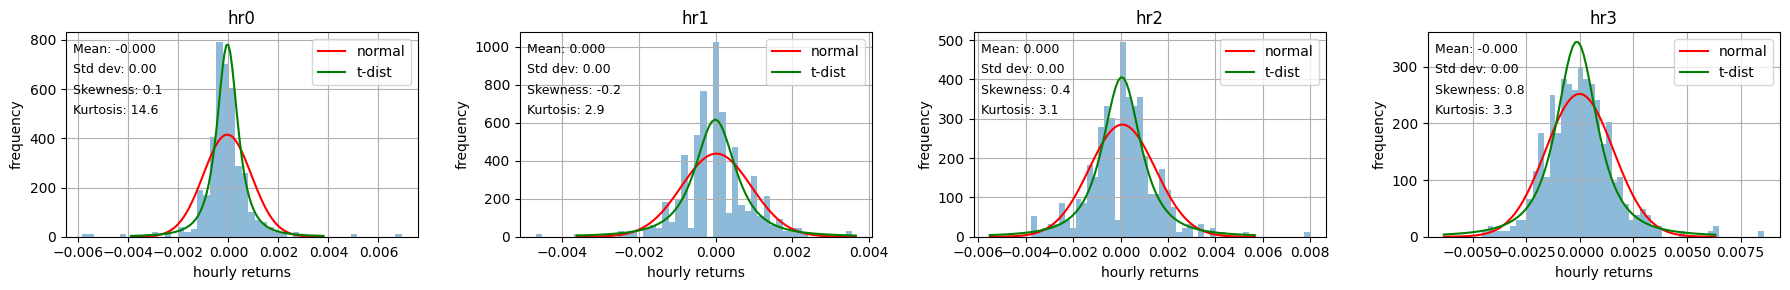

2


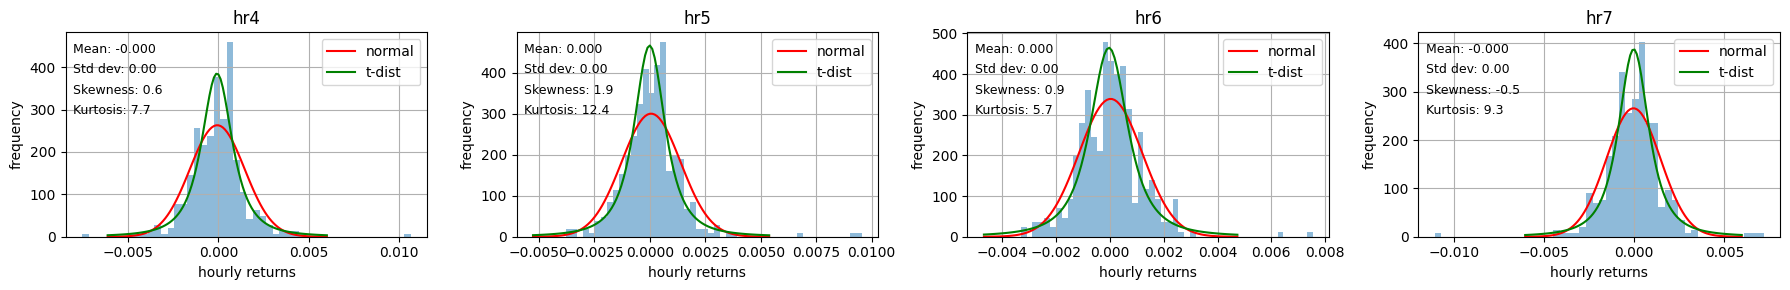

3


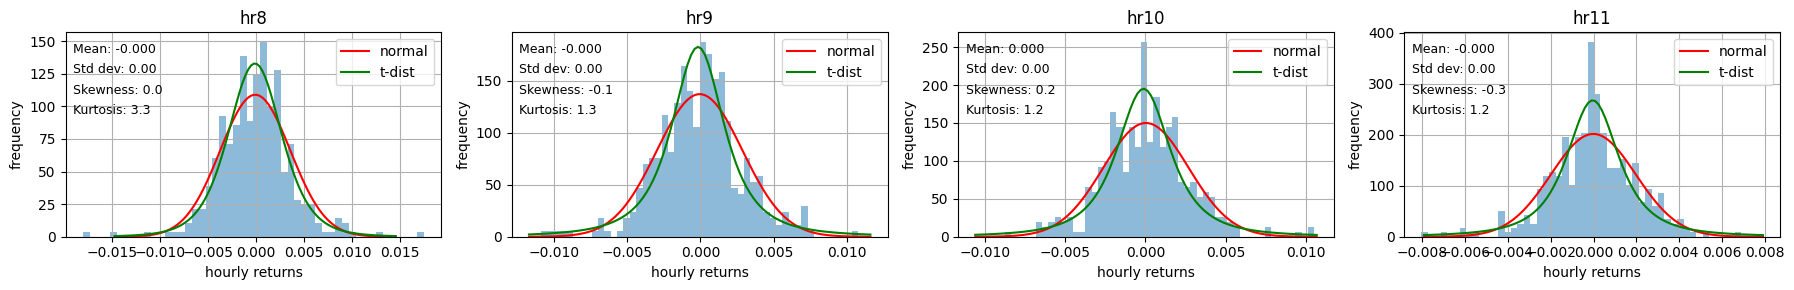

4


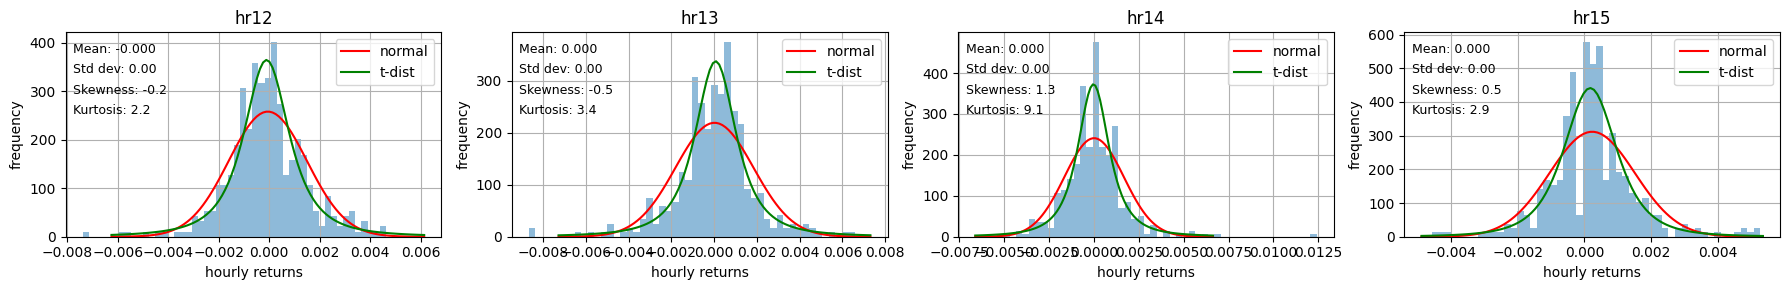

5


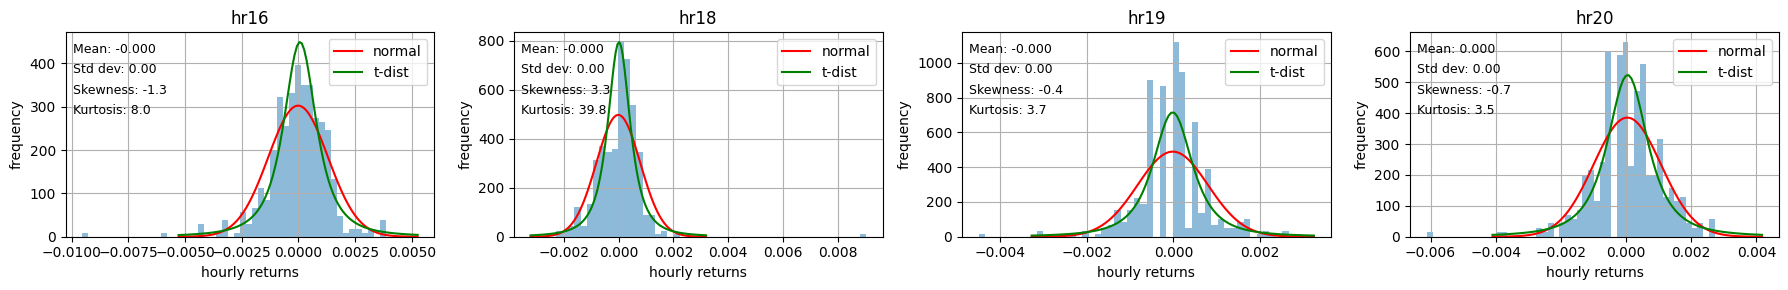

6


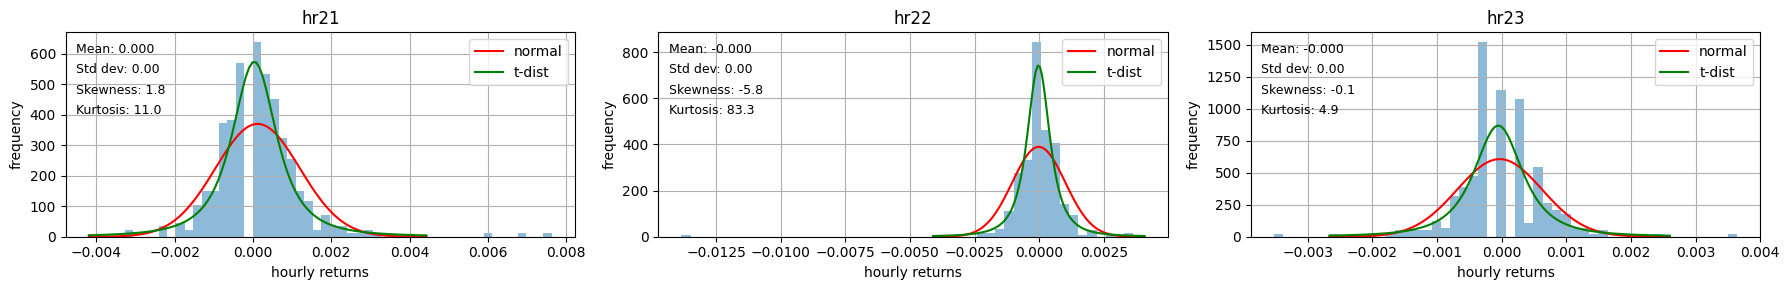

In [ ]:
ncols = 4
for x in range(1,1+int((hourly_returns.shape[1]+1)/ncols)):
    print(x)
    exp.plot_histograms(hourly_returns.iloc[:,ncols*(x-1):ncols*x],label='hourly returns')
    plt.show()

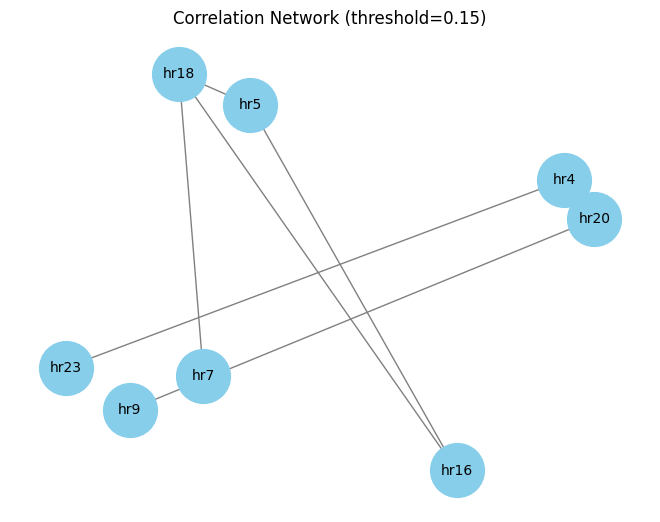

In [ ]:
exp.correlation_network(correlation_matrix,threshold=0.15)

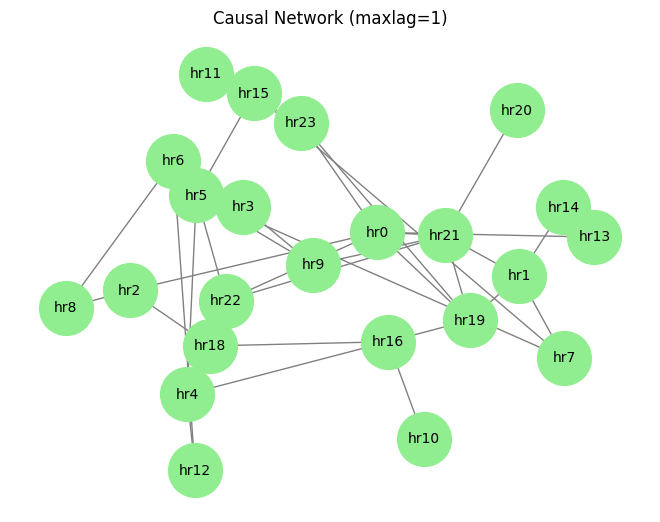

In [ ]:
exp.causal_network(hourly_returns,maxlag=1)

In [ ]:
exp.granger_causality(hourly_returns,maxlag=1)

Granger Causality Test Results:
Does hr0 cause hr1?
Lag 1: p-value = 0.7019
----
Does hr0 cause hr2?
Lag 1: p-value = 0.0059
  => Significant evidence of causality at lag 1
----
Does hr0 cause hr3?
Lag 1: p-value = 0.2638
----
Does hr0 cause hr4?
Lag 1: p-value = 0.331
----
Does hr0 cause hr5?
Lag 1: p-value = 0.9916
----
Does hr0 cause hr6?
Lag 1: p-value = 0.7857
----
Does hr0 cause hr7?
Lag 1: p-value = 0.5826
----
Does hr0 cause hr8?
Lag 1: p-value = 0.6791
----
Does hr0 cause hr9?
Lag 1: p-value = 0.2065
----
Does hr0 cause hr10?
Lag 1: p-value = 0.3166
----
Does hr0 cause hr11?
Lag 1: p-value = 0.7442
----
Does hr0 cause hr12?
Lag 1: p-value = 0.1294
----
Does hr0 cause hr13?
Lag 1: p-value = 0.3042
----
Does hr0 cause hr14?
Lag 1: p-value = 0.3197
----
Does hr0 cause hr15?
Lag 1: p-value = 0.2205
----
Does hr0 cause hr16?
Lag 1: p-value = 0.7926
----
Does hr0 cause hr18?
Lag 1: p-value = 0.9452
----
Does hr0 cause hr19?
Lag 1: p-value = 0.7476
----
Does hr0 cause hr20?
Lag 1: p-

Causal Matrix:


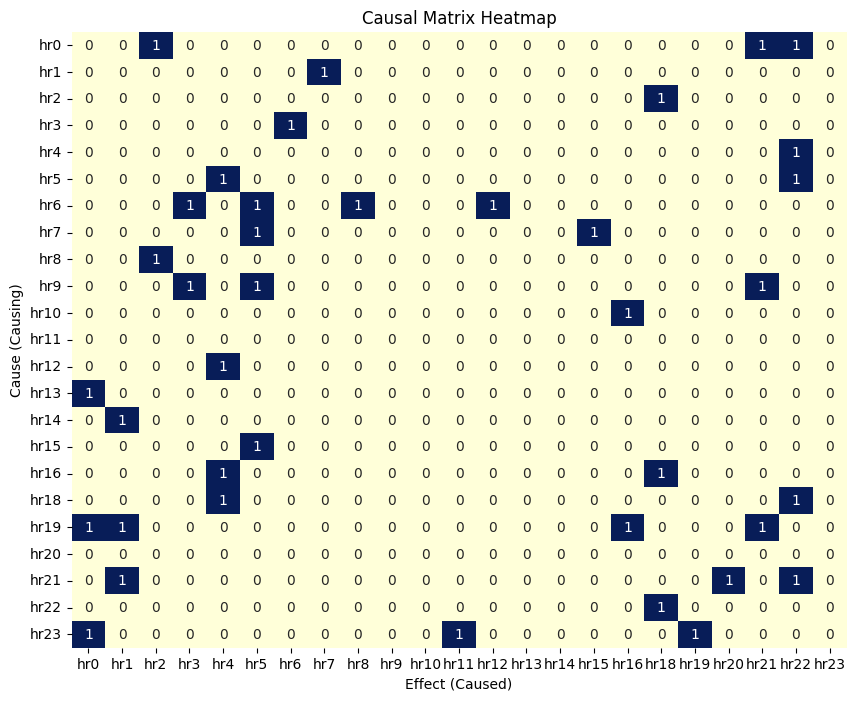

In [ ]:
# Calculate the causal matrix
causal_result = exp.causal_matrix(hourly_returns, maxlag=1)

# Display the causal matrix
print("Causal Matrix:")
# display(causal_result)

# Visualize the causal matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(causal_result, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Causal Matrix Heatmap")
plt.xlabel("Effect (Caused)")  # Label for columns (effects)
plt.ylabel("Cause (Causing)")  # Label for rows (causes)
plt.show()

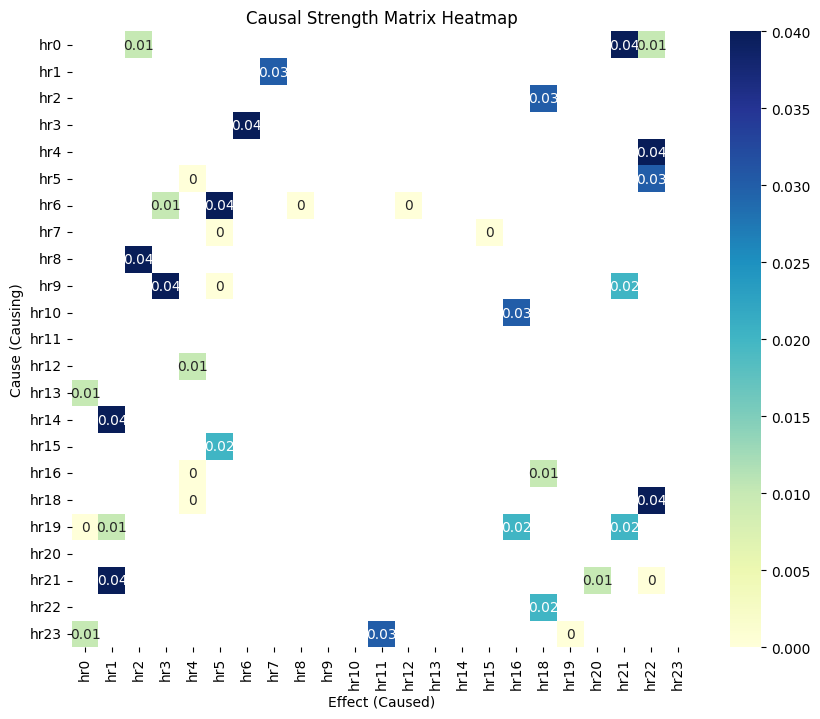

In [ ]:
causal_strength_matrix = exp.causal_strength_matrix(hourly_returns, maxlag=1)

In [ ]:
all_data.loc['ZB=F'].head()

Open       High        Low      Close  Volume  \
Datetime                                                                        
2022-09-19 01:00:00-04:00  131.00000  131.00000  130.90625  130.93750     575   
2022-09-19 02:00:00-04:00  130.93750  131.00000  130.81250  131.00000    2285   
2022-09-19 03:00:00-04:00  131.00000  131.03125  130.68750  130.71875    2580   
2022-09-19 04:00:00-04:00  130.71875  130.75000  130.56250  130.56250    2669   
2022-09-19 05:00:00-04:00  130.59375  130.62500  130.56250  130.62500    1798   

                               rets  hour  
Datetime                                   
2022-09-19 01:00:00-04:00 -0.000477     1  
2022-09-19 02:00:00-04:00  0.000477     2  
2022-09-19 03:00:00-04:00 -0.002149     3  
2022-09-19 04:00:00-04:00 -0.001196     4  
2022-09-19 05:00:00-04:00  0.000479     5

In [ ]:
data = all_data.loc['ZB=F']['Close'].to_frame().copy()
data.tail()

Close
Datetime                            
2024-09-17 05:00:00-04:00  127.37500
2024-09-17 06:00:00-04:00  127.31250
2024-09-17 07:00:00-04:00  127.50000
2024-09-17 08:00:00-04:00  127.15625
2024-09-17 09:00:00-04:00  127.28125

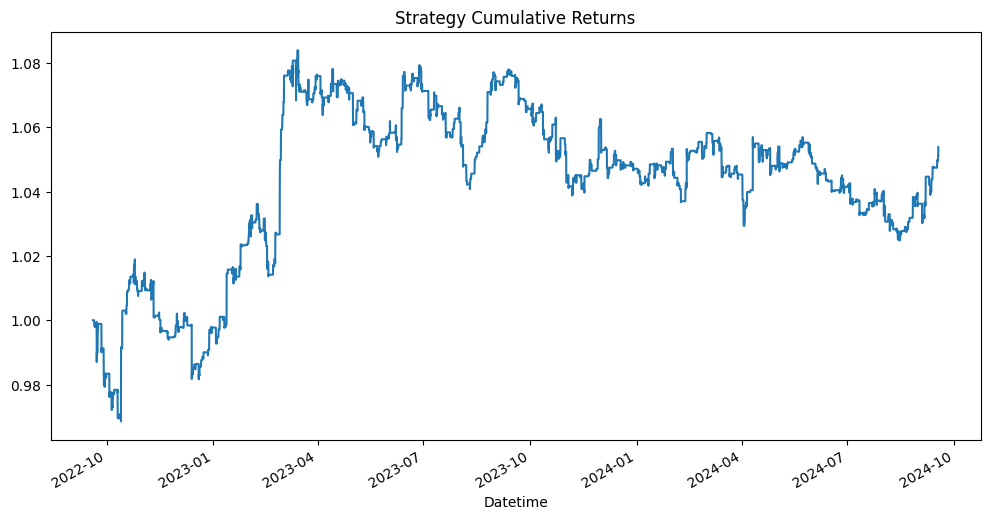

Final Portfolio Value: 105389.06


In [ ]:
st = Strategy()
st.mean_reversion(data,lookback= 12, band_tol=2)

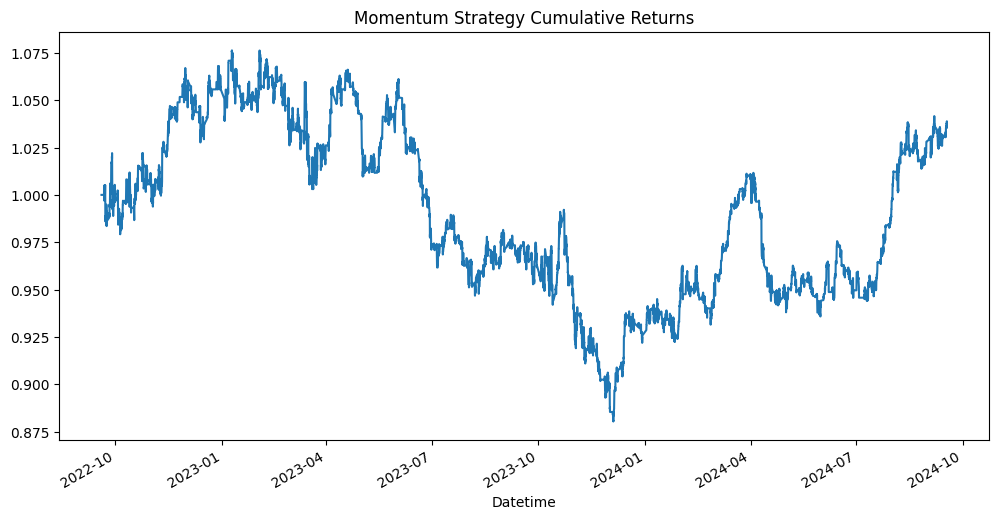

Final Portfolio Value: 103708.43


In [ ]:
st.momentum(data,st_lb=20,lt_lb=50,rsi_lb=14,rsi_ut=70,rsi_lt=30)

In [ ]:
initial_capital = 100000
data['Strategy Value'] = initial_capital * data['Cumulative']

# Show the final strategy value
print(f"Final Portfolio Value: {data['Strategy Value'].iloc[-1]:.2f}")

Final Portfolio Value: 103708.43


## Feature engineering

In [ ]:
# all_data.loc['ZB=F'][['Open','High','Low','Close','Volume']]#.to_frame()

In [ ]:
# add_all_ta_features(all_data.loc['ZB=F'][['Open','High','Low','Close','Volume']],
#                     open="Open", high="High", low="Low", close="Close",
#                     volume="Volume")

In [55]:
# Feature Engineering
# data = all_data.loc['ZB=F']['Close'].to_frame().copy()
data = add_all_ta_features(all_data.loc['ZB=F'][['Open','High','Low','Close',
                                                 'Volume']],
                           open="Open", high="High", low="Low", close="Close",
                           volume="Volume")

# data.columns
data['SMA'] = ta.trend.sma_indicator(data['Close'], window=14)
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
data['MACD'] = ta.trend.macd(data['Close'])
data['Bollinger_High'] = ta.volatility.bollinger_hband(data['Close'])
data['Bollinger_Low'] = ta.volatility.bollinger_lband(data['Close'])


def hurst_exponent(series):
    H, _, _ = compute_Hc(series)
    return H

data['Hurst'] = data['Close'].rolling(window=100).apply(hurst_exponent)

# Prepare dataset
features = ['SMA','RSI','MACD','Bollinger_High','Bollinger_Low','Hurst',
            'momentum_rsi', 'trend_macd_diff']  # Example features
# data = data.dropna(how='all')



In [56]:
# data['Close'].unique()
# data
data.columns # Full features

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

In [89]:
# Label creation: Predict future price movements (binary classification: Buy/Sell)
# data['returns'] = data['Close'].pct_change().shift(-1)
# data['target'] = np.where(data['returns'] > 0, 1, 0)

# bid_ask = 0.03125
# X = data[features].dropna()
# # y = data['target']
# y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)  # Binary target
# y = np.where(data['Close'].shift(-1) < data['Close'], 2, y)  # Binary target
# y = y[-X.shape[0]:]
# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
#                                                     shuffle=False)
st = Strategy()
# features = data.columns.tolist()
X_train, X_test, y_train, y_test = st.split_data(data,features,
                                                 position_type='long_short')


X_train size: (9096, 8)
X_test size: (2274, 8)
y_train size: (9096,)
y_test size: (2274,)


In [90]:
data.shape

(11469, 97)

In [91]:
# # Prepare features and target
# features = ['SMA', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low', 'Hurst']
# X = data[features].dropna()
# y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)  # Binary target

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')

# XGBoost
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}')


Random Forest Accuracy: 0.41908531222515394
XGBoost Accuracy: 0.43051890941073


In [104]:
# data[-X_test.shape[0]]
data[-X_test.shape[0]:].index

DatetimeIndex(['2024-04-24 18:00:00-04:00', '2024-04-24 19:00:00-04:00',
               '2024-04-24 20:00:00-04:00', '2024-04-24 21:00:00-04:00',
               '2024-04-24 22:00:00-04:00', '2024-04-24 23:00:00-04:00',
               '2024-04-25 00:00:00-04:00', '2024-04-25 01:00:00-04:00',
               '2024-04-25 02:00:00-04:00', '2024-04-25 03:00:00-04:00',
               ...
               '2024-09-17 00:00:00-04:00', '2024-09-17 01:00:00-04:00',
               '2024-09-17 02:00:00-04:00', '2024-09-17 03:00:00-04:00',
               '2024-09-17 04:00:00-04:00', '2024-09-17 05:00:00-04:00',
               '2024-09-17 06:00:00-04:00', '2024-09-17 07:00:00-04:00',
               '2024-09-17 08:00:00-04:00', '2024-09-17 09:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=2274, freq=None)

In [105]:
# Generate signals
result = pd.DataFrame(index=data[-X_test.shape[0]:].index)
result['RF_sig'] = 0
result['XGB_sig'] = 0
result.loc[data[-X_test.shape[0]:].index, 'RF_sig'] = y_pred_rf  # or y_pred_xgb
result.loc[data[-X_test.shape[0]:].index, 'XGB_sig'] = y_pred_xgb  # or y_pred_xgb

<Axes: xlabel='Datetime'>

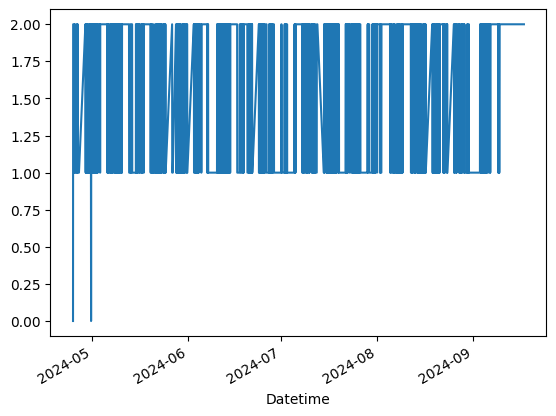

In [119]:
result['RF_pos'].plot()
result['XGB_pos'].plot()

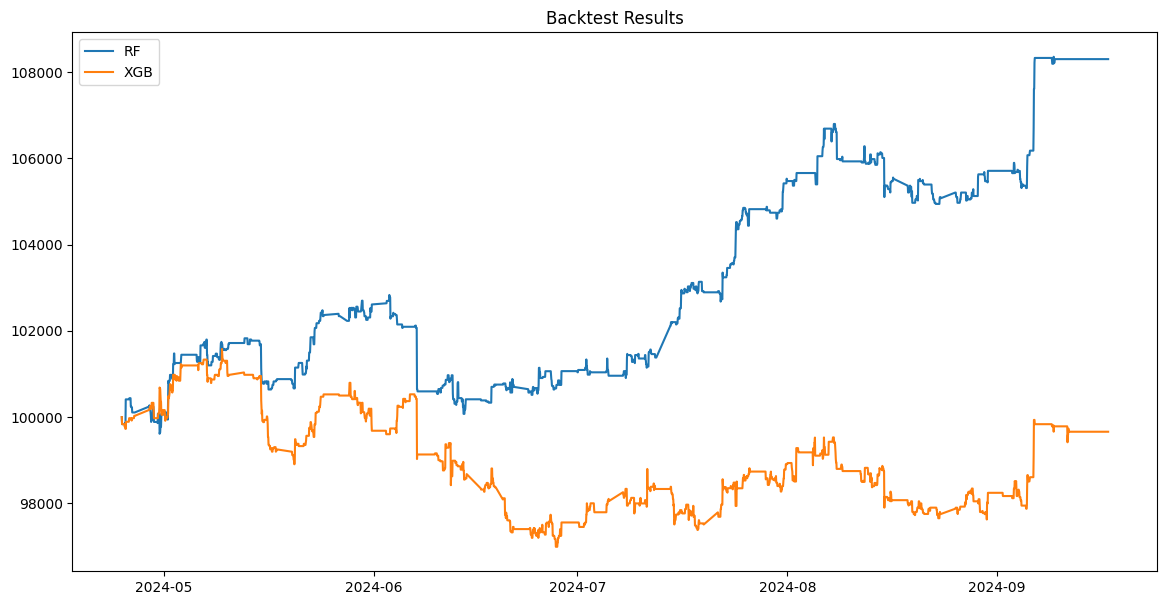

In [107]:
# Backtesting
initial_capital = 100000
result['RF_pos'] = result['RF_sig'].shift().fillna(0).values
result['RF_val'] = initial_capital * (1 + result['RF_pos'].diff().fillna(0) * data['Close'].pct_change().fillna(0)).cumprod()
result['XGB_pos'] = result['XGB_sig'].shift().fillna(0)
result['XGB_val'] = initial_capital * (1 + result['XGB_pos'].diff().fillna(0) * data['Close'].pct_change().fillna(0)).cumprod()


# Plot results
plt.figure(figsize=(14, 7))
plt.plot(result.loc[data[-X_test.shape[0]:].index,['RF_val','XGB_val']], label=['RF','XGB'])
plt.title('Backtest Results')
plt.legend()
plt.show()

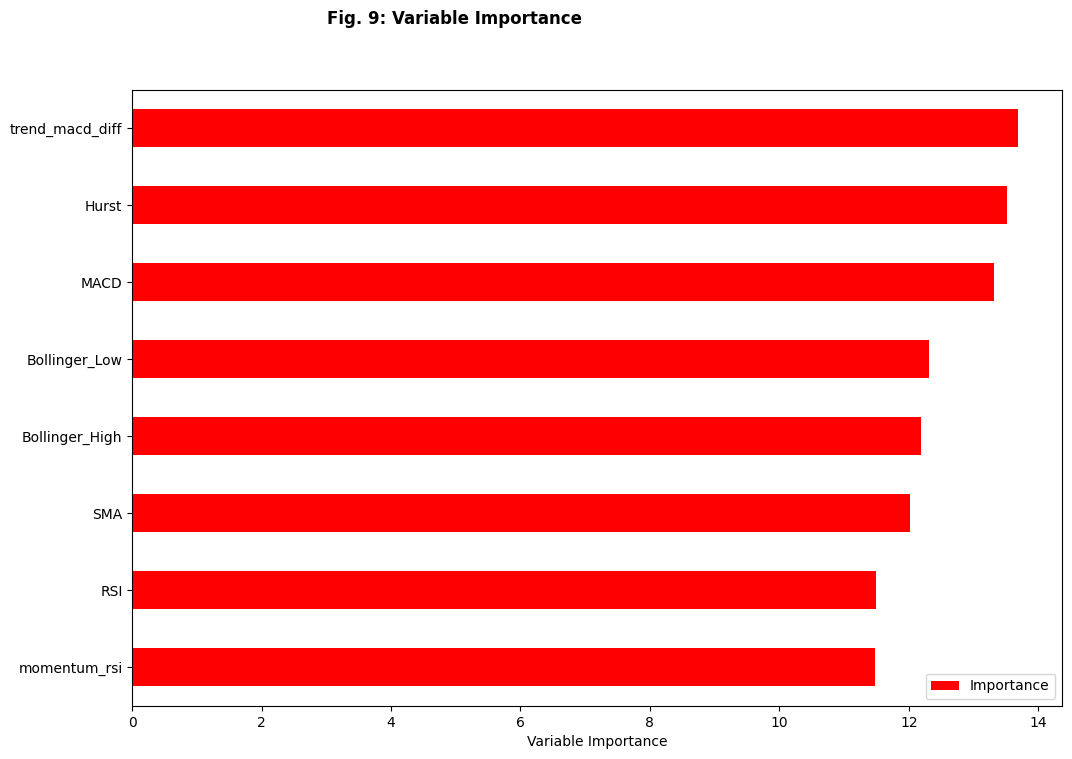

In [109]:
# data['Position'].tail(10).plot()
Importance = pd.DataFrame(
    {"Importance": rf.feature_importances_ * 100}, index=features
)
Importance.sort_values("Importance", axis=0, ascending=True).plot(
    kind="barh", color="r", figsize=(12, 8)
)
plt.xlabel("Variable Importance")
plt.suptitle(
    "Fig. 9: Variable Importance", fontweight="bold", horizontalalignment="right"
)
plt.show()

In [110]:
np.sqrt(252*24)*(result['RF_pos'].diff().fillna(0) * data['Close'].pct_change().fillna(0)).dropna().mean()/(result['RF_pos'].diff().fillna(0) * data['Close'].pct_change().fillna(0)).dropna().std()

3.3523541004702624

In [111]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f'Optimized XG boost Accuracy: {accuracy_score(y_test, y_pred_best_rf)}')


Optimized XG boost Accuracy: 0.42700087950747584


In [112]:
# test options for classification
num_folds = 10
seed = 42
scoring = "accuracy"
metrics = {
    "balanced_accuracy": "Accuracy",
    "roc_auc": "AUC",
    "neg_log_loss": "Log Loss",
    "f1_weighted": "F1",
    "precision_weighted": "Precision",
    "recall_weighted": "Recall",
}

In [113]:
def run_cv(clf, X=X_train, y=y_train, metrics=metrics, cv=10, fit_params=None, n_jobs=-1):
    start = time()
    scores = cross_validate(
        estimator=clf,
        X=X,
        y=y,
        scoring=list(metrics.keys()),
        cv=cv,
        return_train_score=True,
        n_jobs=n_jobs,
        verbose=1,
        fit_params=fit_params,
    )
    duration = time() - start
    return scores, duration

In [114]:
def stack_results(scores):
    columns = pd.MultiIndex.from_tuples(
        [tuple(m.split("_", 1)) for m in scores.keys()], names=["Dataset", "Metric"]
    )
    data = np.array(list(scores.values())).T
    df = pd.DataFrame(data=data, columns=columns).iloc[:, 2:]
    results = pd.melt(df, value_name="Value")
    results.Metric = results.Metric.apply(lambda x: metrics.get(x))
    results.Dataset = results.Dataset.str.capitalize()
    return results

In [115]:
def plot_result(df, model=None, fname=None):
    m = list(metrics.values())
    g = sns.catplot(
        x="Dataset",
        y="Value",
        hue="Dataset",
        col="Metric",
        data=df,
        col_order=m,
        order=["Train", "Test"],
        kind="box",
        col_wrap=3,
        sharey=False,
        height=4,
        aspect=1.2,
    )
    df = df.groupby(["Metric", "Dataset"]).Value.mean().unstack().loc[m]
    for i, ax in enumerate(g.axes.flat):
        s = f"Train: {df.loc[m[i], 'Train']:>7.4f}\nTest:  {df.loc[m[i], 'Test'] :>7.4f}"
        ax.text(
            0.05,
            0.85,
            s,
            fontsize=10,
            transform=ax.transAxes,
            bbox=dict(facecolor="white", edgecolor="grey", boxstyle="round,pad=0.5"),
        )
    g.fig.suptitle(model, fontsize=16)
    g.fig.subplots_adjust(top=0.9)
    if fname:
        g.savefig(fname, dpi=300);

In [116]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
algo = "dummy_clf"

In [117]:
fname = f"{algo}.joblib"

dummy_cv_result, run_time_algo = run_cv(dummy_clf)
joblib.dump(dummy_cv_result, fname)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


['dummy_clf.joblib']

In [118]:
dummy_result = stack_results(dummy_cv_result)
dummy_result.groupby(["Metric", "Dataset"]).Value.mean().unstack()

Dataset         Test      Train
Metric                         
AUC              NaN        NaN
Accuracy    0.330016   0.334169
F1          0.412117   0.418247
Log Loss  -21.207890 -20.945768
Precision   0.412873   0.417634
Recall      0.411605   0.418878

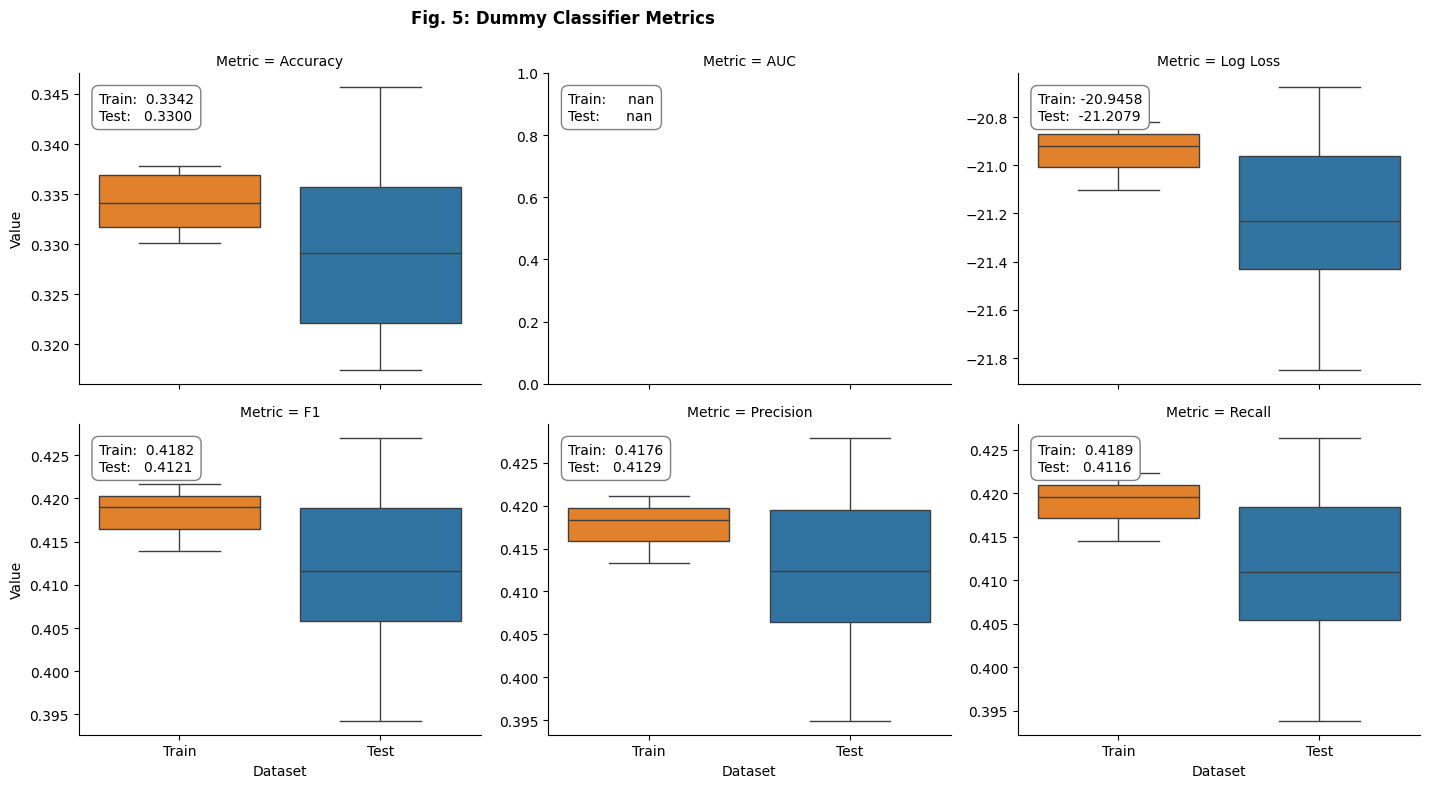

In [73]:
plot_result(dummy_result, model="Dummy Classifier")
plt.suptitle(
    "Fig. 5: Dummy Classifier Metrics", fontweight="bold", horizontalalignment="right"
)
plt.show()

In [74]:
# spot check the algorithms
models = []
models.append(("LR", LogisticRegression(n_jobs=-1)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
# Neural Network
models.append(("NN", MLPClassifier()))
# Ensemble Models
# Boosting methods
models.append(("AB", AdaBoostClassifier()))
models.append(("GBM", GradientBoostingClassifier()))
# Bagging methods
models.append(("RF", RandomForestClassifier(n_jobs=-1)))
models.append(("ET", ExtraTreesClassifier(n_jobs=-1)))
models.append(("Bagging", BaggingClassifier()))
models.append(("ExtraTrees", ExtraTreesClassifier()))
# models.append(("Stacking", StackingClassifier(estimators=100, final_estimator=LogisticRegression())))
# models.append(("Voting", VotingClassifier(estimators=100)))
models.append(("XGB", XGBClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(("CatBoost", CatBoostClassifier(verbose=0)))
models.append(("HistGradientBoosting", HistGradientBoostingClassifier()))
# models.append(("AdaBoost", AdaBoostClassifier()))
# models.append(("GradientBoosting", GradientBoostingClassifier()))

In [75]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.445800 (0.015293)
LDA: 0.453386 (0.011483)
KNN: 0.432608 (0.016247)
CART: 0.416669 (0.021664)
NB: 0.453932 (0.012277)
NN: 0.439421 (0.014419)
AB: 0.454812 (0.017791)
GBM: 0.445571 (0.026582)
RF: 0.456788 (0.018534)
ET: 0.452063 (0.021103)
Bagging: 0.452721 (0.020236)
ExtraTrees: 0.452942 (0.017737)
XGB: 0.454592 (0.023170)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 8186, number of used features: 8
[LightGBM] [Info] Start training from score -2.289961
[LightGBM] [Info] Start training from score -0.807698
[LightGBM] [Info] Start training from score -0.792202
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

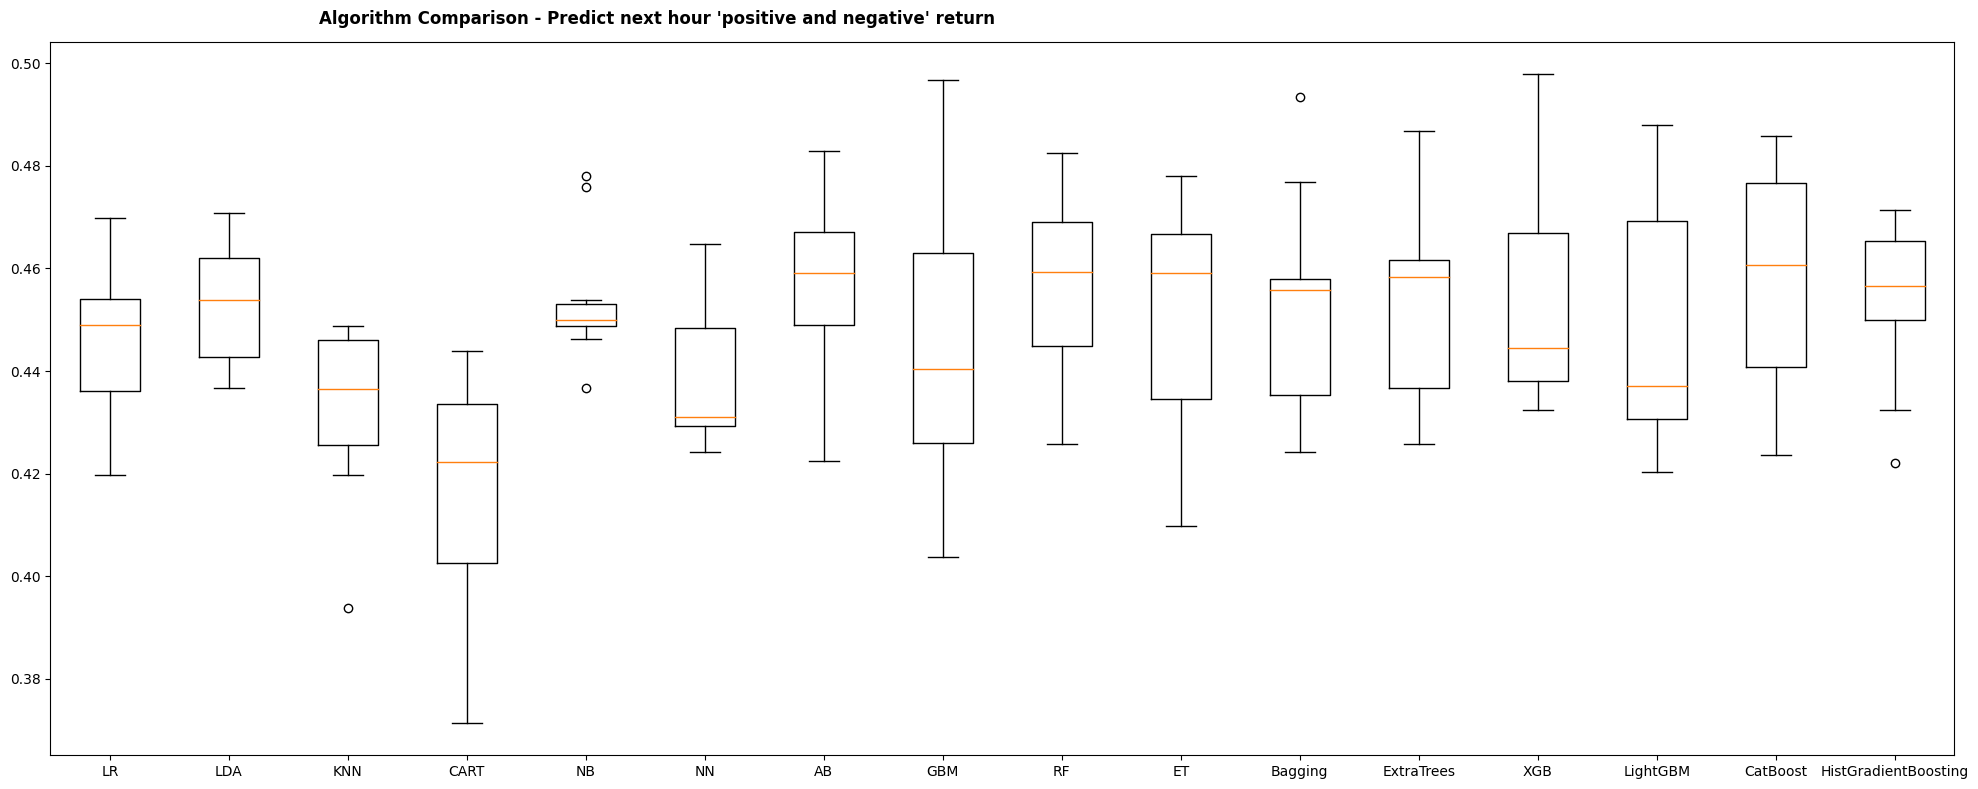

In [76]:
# compare algorithms
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(20, 8)
plt.suptitle(
    "Algorithm Comparison - Predict next hour 'positive and negative' return",
    fontweight="bold", horizontalalignment="right"
)
plt.tight_layout()
plt.show()

In [77]:

# Scaling the data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define the parameter grid for Logistic Regression
C = [0.1, 1, 10]
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
param_grid = dict(C=C, penalty=penalty, solver=solver)

# Define the model
model = LogisticRegression(n_jobs=-1, max_iter=10000)

# Set up the grid search
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
ranks = grid_result.cv_results_["rank_test_score"]
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))


Best: 0.453606 using {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
#6 0.452505 (0.012930) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
#4 0.452835 (0.012683) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
#11 0.451187 (0.010162) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
#12 0.450637 (0.011242) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
#9 0.452065 (0.009622) with: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
#10 0.451406 (0.010361) with: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
#8 0.452176 (0.012999) with: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
#7 0.452396 (0.011929) with: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
#5 0.452505 (0.011557) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
#3 0.453056 (0.010860) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
#2 0.453605 (0.010571) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
#1 0.453606 (0.011039) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [78]:
grid_result.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}

In [79]:
# prepare model
model = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)

In [80]:
algo_forest = "logistic_regression"

In [81]:
fname = f"{algo_forest}.joblib"

lr_cv_result, run_time_algo_forest = run_cv(model)
joblib.dump(lr_cv_result, fname)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.2s finished


['logistic_regression.joblib']

In [82]:
lr_result = stack_results(lr_cv_result)
lr_result.groupby(["Metric", "Dataset"]).Value.mean().unstack()

Dataset        Test     Train
Metric                       
AUC             NaN       NaN
Accuracy   0.332183  0.334116
F1         0.407521  0.414739
Log Loss  -0.948690 -0.947713
Precision  0.404352  0.406791
Recall     0.449865  0.452519

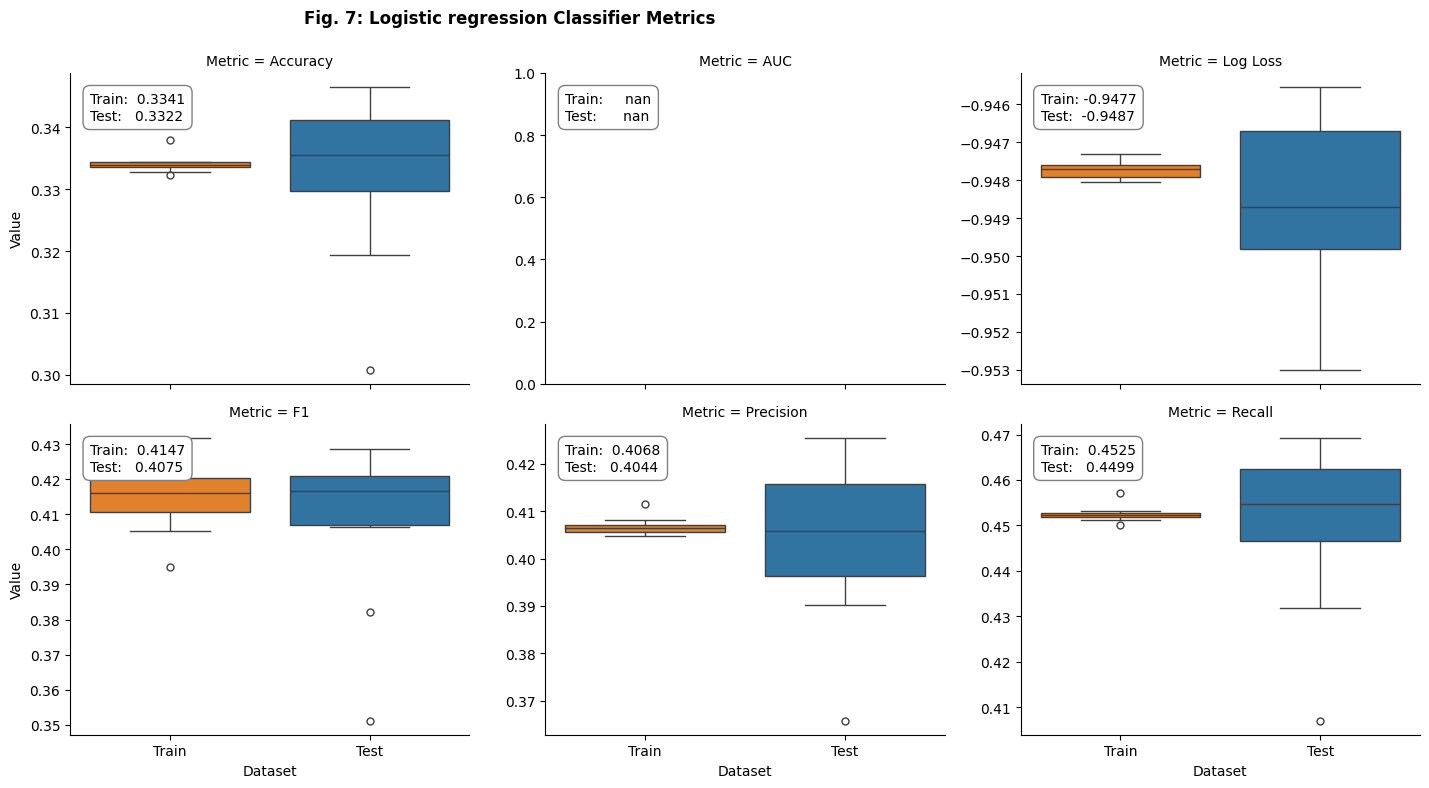

In [83]:
plot_result(lr_result, model="Logistic regression Classifier")
plt.suptitle(
    "Fig. 7: Logistic regression Classifier Metrics",
    fontweight="bold",
    horizontalalignment="right",
)
plt.show()

In [84]:
results = {
    "Baseline": dummy_result,
    "Logistic regression": lr_result,
}
df = pd.DataFrame()
for model, result in results.items():
    df = pd.concat(
        [
            df,
            result.groupby(["Metric", "Dataset"])
            .Value.mean()
            .unstack()["Test"]
            .to_frame(model),
        ],
        axis=1,
    )

df.T.sort_values("AUC", ascending=False)

Metric               AUC  Accuracy        F1  Log Loss  Precision    Recall
Baseline             NaN  0.330016  0.412117 -21.20789   0.412873  0.411605
Logistic regression  NaN  0.332183  0.407521  -0.94869   0.404352  0.449865

In [85]:
# model = RandomForestClassifier(
#     criterion="gini", n_estimators=80, max_depth=10, n_jobs=-1
# )
model = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)
model.fit(X_train, y_train)
# estimate accuracy on validation set
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.41908531222515394
[[  0  75 239]
 [  0 229 811]
 [  0 196 724]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       314
           1       0.46      0.22      0.30      1040
           2       0.41      0.79      0.54       920

    accuracy                           0.42      2274
   macro avg       0.29      0.34      0.28      2274
weighted avg       0.37      0.42      0.35      2274



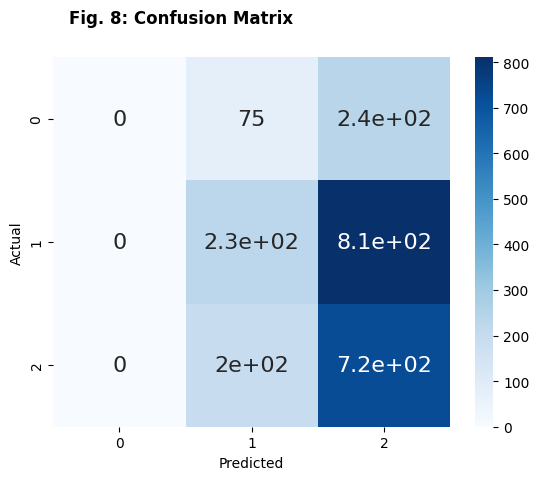

In [86]:
df_cm = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=np.unique(y_test),
    index=np.unique(y_test),
)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})  # font sizes
plt.suptitle("Fig. 8: Confusion Matrix", fontweight="bold", horizontalalignment="right")
plt.show()